In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/程式/fashion")
os.getcwd()

'/content/drive/MyDrive/程式/fashion'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定義激活函數
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))#keepdims用於保持同樣長度
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# 定義交叉熵損失函數
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true.argmax(axis=1)])
    loss = np.sum(log_likelihood) / m
    return loss

# 隨機初始化權重和偏置
def initialize_weights(input_size, hidden_size_1, hidden_size_2, output_size):
    W1 = np.random.randn(input_size, hidden_size_1) * 0.01 # 第一層權重
    b1 = np.zeros((1, hidden_size_1))
    W2 = np.random.randn(hidden_size_1, hidden_size_2) * 0.01 # 第二層權重
    b2 = np.zeros((1, hidden_size_2))
    W3 = np.random.randn(hidden_size_2, output_size) * 0.01 # 輸出層權重
    b3 = np.zeros((1, output_size))

    return W1, b1, W2, b2, W3, b3

# 前向傳播計算
def forward(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1  # 第一層線性變換
    A1 = relu(Z1)  # 第一層activation
    Z2 = np.dot(A1, W2) + b2  # 第二層線性變換
    A2 = relu(Z2)  # 第二層activation
    Z3 = np.dot(A2, W3) + b3  # 輸出層線性變換
    A3 = softmax(Z3)  # 輸出層activation
    return A1, A2, A3

# 反向傳播
def backward(X, y, A1, A2, A3, W1, W2, W3):
    m = X.shape[0]

    # 計算輸出層的梯度
    dZ3 = A3 - y
    dW3 = np.dot(A2.T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    # 隱藏層 2 的梯度
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * relu_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    # 隱藏層 1 的梯度
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

# 更新權重和偏置
def update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3

# 訓練模型
def train(X_train, y_train,X_test,y_test, input_size, hidden_size_1, hidden_size_2, output_size, batch_size, epochs, learning_rate):
  W1, b1, W2, b2, W3, b3 = initialize_weights(input_size, hidden_size_1, hidden_size_2, output_size)
  loss_l,loss_v_l=[],[]
  for epoch in range(epochs):

        # 隨機打亂訓練數據
    perm = np.random.permutation(X_train.shape[0])
    X_train = X_train[perm]
    y_train = y_train[perm]

    for i in range(0, X_train.shape[0], batch_size):

            # Mini-Batch 分批處理
      X_batch = X_train[i:i+batch_size]
      y_batch = y_train[i:i+batch_size]

            # 前向傳播
      A1, A2, A3 = forward(X_batch, W1, b1, W2, b2, W3, b3)
      A1_v, A2_v, A3_v = forward(X_test, W1, b1, W2, b2, W3, b3)
            # 計算損失
      loss = cross_entropy_loss(y_batch, A3)
      loss_v = cross_entropy_loss(y_test, A3_v)
            # 反向傳播
      dW1, db1, dW2, db2, dW3, db3 = backward(X_batch, y_batch, A1, A2, A3, W1, W2, W3)

            # 更新權重
      W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate)
      loss_l.append(loss)
      loss_v_l.append(loss_v)
        # 每隔一段時間輸出一次損失
      if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}')
        print(f'Epoch {epoch+1}/{epochs}, Val Loss: {loss_v}')

  return W1, b1, W2, b2, W3, b3,loss_l,loss_v_l

# 假設輸入數據是 X_train 和 One-Hot 編碼的標籤是 y_train
input_size = 784  # 輸入層大小
hidden_size_1 = 128  # 第一層隱藏層大小
hidden_size_2 = 64   # 第二層隱藏層大小
output_size = 10
batch_size = 32
epochs = 50
learning_rate = 0.001

# 假設這是您的訓練數據
X_train = np.array(pd.read_csv("./train.csv").iloc[:15000,1:])
y_train = pd.read_csv("./train.csv").iloc[:15000,0]
X_test = np.array(pd.read_csv("./train.csv").iloc[15000:,1:])
y_test = pd.read_csv("./train.csv").iloc[15000:,0]

y_train = np.eye(10)[y_train]  # 轉換為 One-Hot 編碼
y_test= np.eye(10)[y_test]
# 訓練模型
W1, b1,W2,b2,W3,b3,loss_l,loss_v_l = train(X_train, y_train,X_test,y_test, input_size, hidden_size_1, hidden_size_2, output_size, batch_size, epochs, learning_rate)
plt.plot(list(range(0,len(loss_l))), loss_l, label='train', color='b')  # b是藍色
plt.plot(list(range(0,len(loss_v_l))), loss_v_l, label='val', color='r')  # r是紅色

# 添加標題和標籤
plt.title('LOSS')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')

# 顯示圖例

plt.legend()
output_image_path = os.path.join(results_dir, "output.png")
plt.savefig(output_image_path)
pre=[]
pre_data=pd.read_csv()
for i in range(0,pre_data.shape[0]):
  A3 = forward(pre_data.iloc[i,:], W1, b1, W2, b2, W3, b3)
  predicted_class = np.argmax(A3, axis=1)
  pre.append(predicted_class[0])
output_text_path = os.path.join(results_dir, "test_output.txt")
with open('test_output.txt', 'w') as file:
  for item in pre:
    file.write(str(item) + '\n')

<ipython-input-4-b23ed1840dab>:19: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -np.log(y_pred[range(m), y_true.argmax(axis=1)])


Epoch 10/50, Loss: 1.3730713362264901
Epoch 10/50, Val Loss: 1.394062177096152
Epoch 10/50, Loss: 1.3979521782566064
Epoch 10/50, Val Loss: 1.394853589687766
Epoch 10/50, Loss: 1.3843493897567567
Epoch 10/50, Val Loss: 1.3946442127579899
Epoch 10/50, Loss: 1.3756262808992528
Epoch 10/50, Val Loss: 1.3948258095092534
Epoch 10/50, Loss: 1.3886702575303285
Epoch 10/50, Val Loss: 1.3952870999852194
Epoch 10/50, Loss: 1.3976395471729548
Epoch 10/50, Val Loss: 1.3953686831521703
Epoch 10/50, Loss: 1.3907999360424776
Epoch 10/50, Val Loss: 1.3950153773867882
Epoch 10/50, Loss: 1.3876275849925104
Epoch 10/50, Val Loss: 1.3951602659168518
Epoch 10/50, Loss: 1.4145538881022923
Epoch 10/50, Val Loss: 1.3953305366011375
Epoch 10/50, Loss: 1.3988816601954523
Epoch 10/50, Val Loss: 1.3944922164280775
Epoch 10/50, Loss: 1.3879103285867602
Epoch 10/50, Val Loss: 1.394179349199406
Epoch 10/50, Loss: 1.395727571111749
Epoch 10/50, Val Loss: 1.3943394186425595
Epoch 10/50, Loss: 1.388486184016248
Epoch 1

KeyboardInterrupt: 

In [ ]:
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
softmax([1,2,3])

array([0.09003057, 0.24472847, 0.66524096])

In [ ]:
W1 = np.random.randn(784, 10) * 0.01 # 第一層權重
W1

array([[ 8.81854639e-03,  8.12833749e-03,  1.50744944e-02, ...,
         1.32463118e-02, -7.68414729e-03, -2.69164800e-03],
       [ 2.14266888e-05,  1.35121253e-02,  1.03979648e-03, ...,
         3.70087912e-03, -8.97341259e-03, -8.32348772e-04],
       [-1.08648381e-02, -7.50806603e-03, -4.49904239e-03, ...,
         6.00941584e-03, -1.32726809e-02,  7.33087993e-03],
       ...,
       [-6.77230107e-03, -1.66848850e-03,  1.88058245e-02, ...,
        -4.90682438e-04,  5.70466346e-03, -1.63083583e-02],
       [-1.76488273e-02,  3.95261046e-03,  1.22014667e-03, ...,
        -9.85897941e-03, -5.20969082e-03, -2.38127742e-02],
       [-4.61490756e-03, -1.17627298e-04,  1.42821023e-02, ...,
        -2.44297882e-03,  3.66167664e-03, -1.88907909e-02]])

In [ ]:
np.random.randn(2,2)

array([[ 0.54437467, -0.37025142],
       [ 1.49858728,  2.01232416]])

In [ ]:
!python /content/drive/MyDrive/程式/fashion/main.py

Epoch 10/20, Loss: 0.0780581980798519
Epoch 10/20, Val Loss: 0.11094691480948395
Epoch 10/20, Loss: 0.060857939875204194
Epoch 10/20, Val Loss: 0.10365595805679301
Epoch 10/20, Loss: 0.0569223976698127
Epoch 10/20, Val Loss: 0.10324734702576153
Epoch 10/20, Loss: 0.0806233953416798
Epoch 10/20, Val Loss: 0.09955448223630213
Epoch 10/20, Loss: 0.051787171894229204
Epoch 10/20, Val Loss: 0.09909562852888815
Epoch 10/20, Loss: 0.0909266942216143
Epoch 10/20, Val Loss: 0.0961756831949741
Epoch 10/20, Loss: 0.0841479334496925
Epoch 10/20, Val Loss: 0.12663964808489073
Epoch 10/20, Loss: 0.15149958737346264
Epoch 10/20, Val Loss: 0.09410491596052399
Epoch 10/20, Loss: 0.1459111335970647
Epoch 10/20, Val Loss: 0.20246939146066692
Epoch 10/20, Loss: 0.10608445396038796
Epoch 10/20, Val Loss: 0.10003203239131996
Epoch 10/20, Loss: 0.07218445834428115
Epoch 10/20, Val Loss: 0.10235062121058215
Epoch 10/20, Loss: 0.058144956436677706
Epoch 10/20, Val Loss: 0.09701333761908032
Epoch 10/20, Loss: 0

In [ ]:
b=pd.read_csv("/content/drive/MyDrive/程式/fashion/train.csv")

In [ ]:
b

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,28,...,27,40,18,33,10,0,1,1,0,0
3,3,0,0,0,0,0,0,0,0,0,...,51,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,120,...,57,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15998,0,0,0,0,0,0,0,1,5,0,...,147,175,0,0,3,0,0,0,0,0


(-0.5, 27.5, 27.5, -0.5)

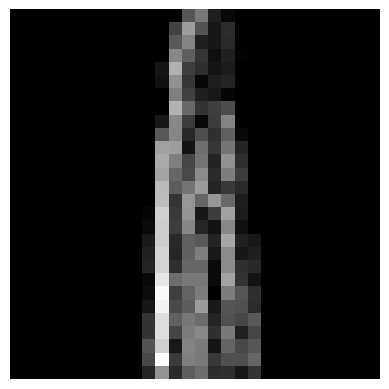

In [ ]:
plt.imshow(np.array(b.iloc[3,1:]).reshape(28,28),cmap='gray')
plt.axis('off')

In [ ]:
import numpy as np

x = np.array([[1, 2, 3],
              [4, 5, 6]])

exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Softmax exponentiation step
print(exp_x)

[[0.13533528 0.36787944 1.        ]
 [0.13533528 0.36787944 1.        ]]


In [ ]:
import numpy as np

# 定義激活函數
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # 防止溢出
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# 定義前向傳播
def forward_pre(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)

    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)

    return A3



# 使用前向傳播來計算預測的概率
A3 = forward(X_new, W1, b1, W2, b2, W3, b3)

# 預測類別：選擇最大概率的索引作為預測類別
predicted_class = np.argmax(A3, axis=1)  # axis=1 表示對每一行取最大值
print("Predicted class:", predicted_class)


NameError: name 'X_new' is not defined

In [ ]:
pre=[]
pre_data=pd.read_csv("/content/drive/MyDrive/程式/fashion/test.csv")
for i in range(0,pre_data.shape[0]):
  A3 = forward(pre_data.iloc[i,:], W1, b1, W2, b2, W3, b3)
  predicted_class = np.argmax(A3, axis=1)
  pre.append(predicted_class[0])
with open('test_output.txt', 'w') as file:
  for item in pre:
    file.write(str(item) + '\n')

Epoch 10/10, Loss: 0.13034190044489588
Epoch 10/10, Val Loss: 0.13553150268135428
Epoch 10/10, Loss: 0.10431901868897071
Epoch 10/10, Val Loss: 0.10538404469961868
Epoch 10/10, Loss: 0.25780169484757565
Epoch 10/10, Val Loss: 0.10751229709346453
Epoch 10/10, Loss: 0.2404922516094905
Epoch 10/10, Val Loss: 0.1454250256841033
Epoch 10/10, Loss: 0.09495326723656872
Epoch 10/10, Val Loss: 0.1527924498060712
Epoch 10/10, Loss: 0.022385744723719386
Epoch 10/10, Val Loss: 0.1044376788155201
Epoch 10/10, Loss: 0.20285138884263942
Epoch 10/10, Val Loss: 0.10780390157580856
Epoch 10/10, Loss: 0.08484208343483397
Epoch 10/10, Val Loss: 0.13532115156206312
Epoch 10/10, Loss: 0.11330828093745587
Epoch 10/10, Val Loss: 0.1944828405282221
Epoch 10/10, Loss: 0.1236531670623923
Epoch 10/10, Val Loss: 0.15378566076846129
Epoch 10/10, Loss: 0.09985388257840916
Epoch 10/10, Val Loss: 0.11234144149954338
Epoch 10/10, Loss: 0.10577025004102392
Epoch 10/10, Val Loss: 0.10440603420716636
Epoch 10/10, Loss: 0.

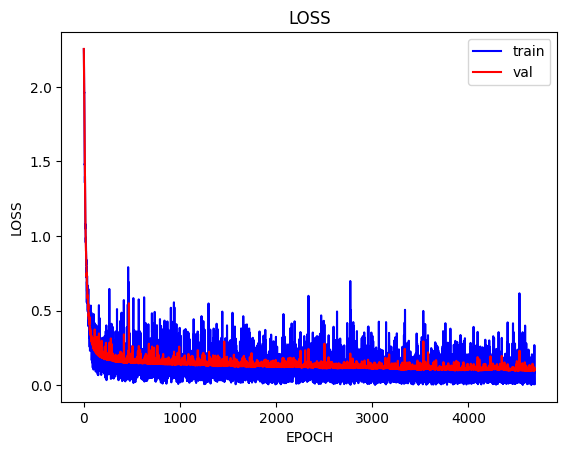

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定義激活函數
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))#keepdims用於保持同樣長度
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# 定義交叉熵損失函數
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true.argmax(axis=1)])
    loss = np.sum(log_likelihood) / m
    return loss

# 隨機初始化權重和偏置
def initialize_weights(input_size, hidden_size_1, hidden_size_2, output_size):
    W1 = np.random.randn(input_size, hidden_size_1) * 0.01
    b1 = np.zeros((1, hidden_size_1))
    W2 = np.random.randn(hidden_size_1, hidden_size_2) * 0.01
    b2 = np.zeros((1, hidden_size_2))
    W3 = np.random.randn(hidden_size_2, output_size) * 0.01
    b3 = np.zeros((1, output_size))

    return W1, b1, W2, b2, W3, b3

# 前向傳播
def forward(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)

    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)

    return A1, A2, A3

# 反向傳播
def backward(X, y, A1, A2, A3, W1, W2, W3):
    m = X.shape[0]

    # 計算輸出層的梯度
    dZ3 = A3 - y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # 隱藏層 2 的梯度
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * relu_derivative(A2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # 隱藏層 1 的梯度
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2, dW3, db3

# 更新權重和偏置
def update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3

# 訓練模型
def train(X_train, y_train,X_test,y_test, input_size, hidden_size_1, hidden_size_2, output_size, batch_size, epochs, learning_rate):
  W1, b1, W2, b2, W3, b3 = initialize_weights(input_size, hidden_size_1, hidden_size_2, output_size)
  loss_l,loss_v_l=[],[]
  for epoch in range(epochs):

        # 隨機打亂訓練數據
    perm = np.random.permutation(X_train.shape[0])
    X_train = X_train[perm]
    y_train = y_train[perm]

    for i in range(0, X_train.shape[0], batch_size):

            # Mini-Batch 分批處理
      X_batch = X_train[i:i+batch_size]
      y_batch = y_train[i:i+batch_size]

            # 前向傳播
      A1, A2, A3 = forward(X_batch, W1, b1, W2, b2, W3, b3)
      A1_v, A2_v, A3_v = forward(X_test, W1, b1, W2, b2, W3, b3)
            # 計算損失
      loss = cross_entropy_loss(y_batch, A3)
      loss_v = cross_entropy_loss(y_test, A3_v)
            # 反向傳播
      dW1, db1, dW2, db2, dW3, db3 = backward(X_batch, y_batch, A1, A2, A3, W1, W2, W3)

            # 更新權重
      W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate)
      loss_l.append(loss)
      loss_v_l.append(loss_v)
        # 每隔一段時間輸出一次損失
      if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}')
        print(f'Epoch {epoch+1}/{epochs}, Val Loss: {loss_v}')

  return W1, b1, W2, b2, W3, b3,loss_l,loss_v_l

# 假設輸入數據是 X_train 和 One-Hot 編碼的標籤是 y_train
input_size = 784  # 輸入層大小
hidden_size1 = 128  # 第一層隱藏層大小
hidden_size2 = 64   # 第二層隱藏層大小
output_size = 10
batch_size = 32
epochs = 10
learning_rate = 0.001

# 假設這是您的訓練數據
X_train = np.array(pd.read_csv("./train.csv").iloc[:15000,1:])
y_train = pd.read_csv("./train.csv").iloc[:15000,0]
X_test = np.array(pd.read_csv("./train.csv").iloc[15000:,1:])
y_test = pd.read_csv("./train.csv").iloc[15000:,0]

y_train = np.eye(10)[y_train]  # 轉換為 One-Hot 編碼
y_test= np.eye(10)[y_test]
# 訓練模型
W1, b1,W2,b2,W3,b3,loss_l,loss_v_l = train(X_train, y_train,X_test,y_test, input_size, hidden_size1, hidden_size2, output_size, batch_size, epochs, learning_rate)
plt.plot(list(range(0,len(loss_l))), loss_l, label='train', color='b')  # b是藍色
plt.plot(list(range(0,len(loss_v_l))), loss_v_l, label='val', color='r')  # r是紅色

# 添加標題和標籤
plt.title('LOSS')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')

# 顯示圖例
plt.legend()
plt.savefig("output.png")
def forward_pre(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)

    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)

    return A3
pre=[]
pre_data=pd.read_csv("./test.csv")
for i in range(0,pre_data.shape[0]):
  A3 = forward_pre(pre_data.iloc[i,:], W1, b1, W2, b2, W3, b3)
  predicted_class = np.argmax(A3, axis=1)
  pre.append(predicted_class[0])
with open('test_output.txt', 'w') as file:
  for item in pre:
    file.write(str(item) + '\n')
print('隱藏層數量:',2)
print('第一層神經元個數:',hidden_size1)
print('第二層神經元個數:',hidden_size2)
print('世代數:',epochs)
# train ACC
pre=[]
for i in range(0,X_train.shape[0]):
  A3 = forward_pre(X_train[i,:], W1, b1, W2, b2, W3, b3)
  predicted_class = np.argmax(A3, axis=1)
  pre.append(predicted_class[0])
y_train1=  np.argmax(y_train, axis=1)
accuracy = np.mean(y_train1 == pre)

print(f'Train Accuracy: {accuracy:.2f}')

pre=[]
for i in range(0,X_test.shape[0]):
  A3 = forward_pre(X_test[i,:], W1, b1, W2, b2, W3, b3)
  predicted_class = np.argmax(A3, axis=1)
  pre.append(predicted_class[0])
y_test=  np.argmax(y_test, axis=1)
accuracy = np.mean(y_test == pre)

print(f'Val Accuracy: {accuracy:.2f}')



In [ ]:
pre=[]
for i in range(0,X_train.shape[0]):
  A3 = forward_pre(X_train[i,:], W1, b1, W2, b2, W3, b3)
  predicted_class = np.argmax(A3, axis=1)
  pre.append(predicted_class[0])
y_train1=  np.argmax(y_train, axis=1)
accuracy = np.mean(y_train1 == pre)

print(f'Train Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [ ]:
pre=[]
for i in range(0,X_test.shape[0]):
  A3 = forward_pre(X_test[i,:], W1, b1, W2, b2, W3, b3)
  predicted_class = np.argmax(A3, axis=1)
  pre.append(predicted_class[0])
y_test=  np.argmax(y_test, axis=1)
accuracy = np.mean(y_test == pre)

print(f'Val Accuracy: {accuracy:.2f}')

Val Accuracy: 0.96


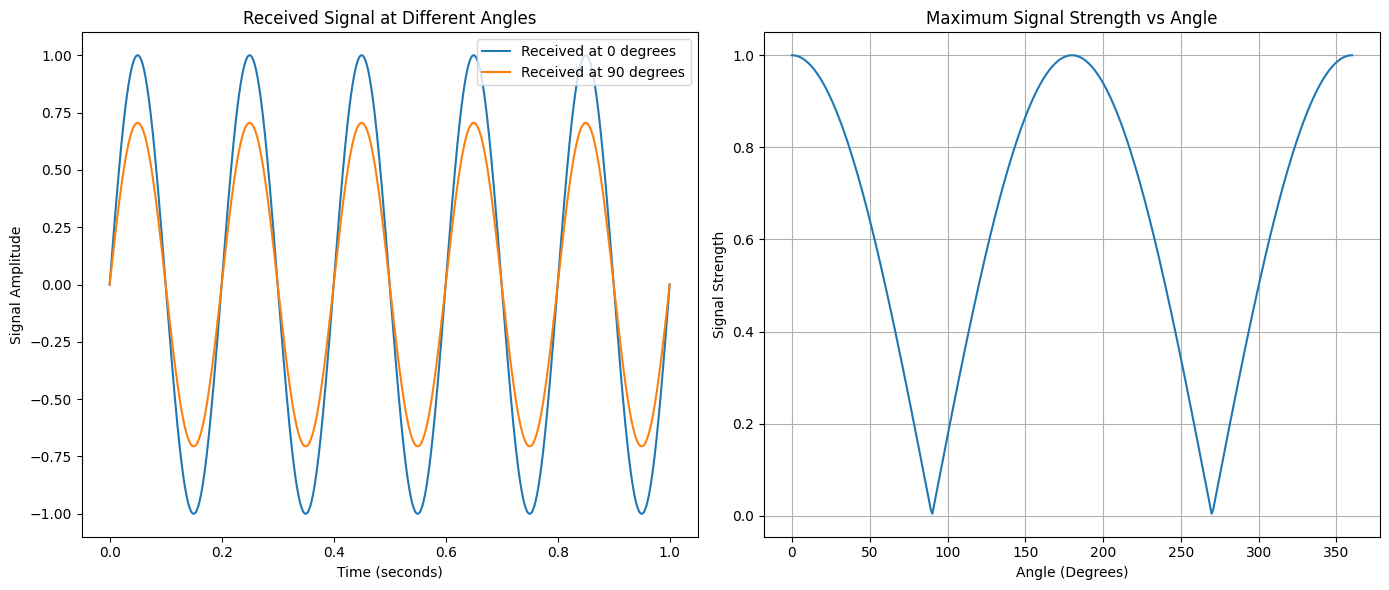

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 设定发射波形（正弦波）
def transmitted_wave(t, frequency=1, amplitude=1):
    return amplitude * np.sin(2 * np.pi * frequency * t)

# 发射天线的辐射模式（使用余弦函数模拟定向辐射）
def transmit_signal_pattern(theta):
    return np.abs(np.cos(np.radians(theta)))  # 在0度方向最强

# 接收天线的辐射模式（假设接收天线为全向天线，强度为1）
def receive_signal_pattern(theta):
    return 1  # 假设接收天线是全向的

# 模拟信号传播到接收天线
def received_signal(t, transmit_pattern, receive_pattern, angle, frequency=1, amplitude=1):
    # 发射信号随时间变化
    transmit_waveform = transmitted_wave(t, frequency, amplitude)

    # 发射天线的辐射模式影响信号强度
    transmit_strength = transmit_pattern(angle)

    # 接收天线的辐射模式影响信号强度（此例假设接收天线是全向的）
    receive_strength = receive_pattern(angle)

    # 总接收信号强度 = 发射信号强度 * 发射天线的方向性 * 接收天线的方向性
    received_waveform = transmit_waveform * transmit_strength * receive_strength
    return received_waveform

# 时间范围与频率
t = np.linspace(0, 1, 1000)  # 1秒内采样1000个点
frequency = 5  # 频率为5Hz
amplitude = 1  # 振幅为1

# 模拟接收信号的角度范围
angles = np.linspace(0, 360, 360)

# 模拟接收信号，假设发射天线在90度方向（示例）
transmit_angle = 90
received_waveforms = []

for angle in angles:
    received_waveforms.append(received_signal(t, transmit_signal_pattern, receive_signal_pattern, angle, frequency, amplitude))

# 将结果转换为NumPy数组
received_waveforms = np.array(received_waveforms)

# 可视化接收到的信号
plt.figure(figsize=(14, 6))

# 使用subplot显示不同接收角度下的信号波形
plt.subplot(1, 2, 1)
plt.plot(t, received_waveforms[0], label="Received at 0 degrees")
plt.plot(t, received_waveforms[45], label="Received at 90 degrees")
# plt.plot(t, received_waveforms[180], label="Received at 180 degrees")
plt.title("Received Signal at Different Angles")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Amplitude")
plt.legend()

# 显示接收信号的强度（根据角度变化）
plt.subplot(1, 2, 2)
plt.plot(angles, np.max(received_waveforms, axis=1), label="Maximum Signal Strength")
plt.title("Maximum Signal Strength vs Angle")
plt.xlabel("Angle (Degrees)")
plt.ylabel("Signal Strength")
plt.grid(True)
plt.tight_layout()

plt.show()


In [7]:
received_waveforms.shape

(360, 1000)